In [152]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# imports for scaling and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
std_scaler = StandardScaler()

# imports for results visualization
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score
import seaborn as sns
import matplotlib.pyplot as plt


In [153]:
# file paths to mex on Colab
data_file = "sample_data/mex.csv"

In [154]:
# read all data
data = pd.read_csv(data_file, header=None)
seed =100 #useful for random generators
print(data.shape)


(6313, 874)


# Accessing different parts of the collected data

In [155]:
# extract class labels from data
y = data.iloc[:, 873]
print(y.shape)



(6313,)


In [156]:
#extract person IDs
id = data.iloc[:, 0]
print(id.shape)


(6313,)


In [157]:
# extract features from wrist accelerometer data
acw_x = data.iloc[:, 1:181]
print(acw_x.shape)

# standard scaler
acw_x_std = pd.DataFrame(std_scaler.fit_transform(acw_x))
print(acw_x_std.head())




(6313, 180)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       170       171       172       173  \
0 -0.515030 -0.456289 -0.365966  ... -0.401797 -0.343222 -0.322133 -0.315246   
1 -0.489836 -0.483460 -0.473175  ... -0.448168 -0.261374 -0.341414 -0.218815   
2 -0.497296 -0.480918 -0.429061  ... -0.240799 -0.448485 -0.357186 -0.068454   
3 -0.413896 -0.441954 -0.400428  ... -0.310292 -0.180566 -0.323165 -0.346335   
4 -0.496684 -0.374821 -0.455551  ... -0.454730 -0.314492 -0.367541 -0.284978   

        174       175       176       177       178     

In [158]:
# extract features from thigh accelerometer data
act_x = data.iloc[:, 181:361]
print(act_x.shape)

# standard scaler
act_x_std = pd.DataFrame(std_scaler.fit_transform(act_x))
print(act_x_std.head())


(6313, 180)
        0         1         2         3         4         5         6    \
0  0.232013 -0.219166 -0.570326  0.567336 -0.449344  0.491671 -0.104109   
1  0.262948 -0.382942 -0.410501  0.785552 -0.573946 -0.301154 -0.279240   
2  0.154318 -0.587960 -0.119088  0.633877 -0.020377  0.012294 -0.547828   
3  0.233592 -0.560385  0.202102  0.254719  0.023642 -0.135439 -0.406348   
4  0.157150 -0.414837  0.239839 -0.160751  0.169072 -0.501084  0.644300   

        7         8         9    ...       170       171       172       173  \
0 -0.557729  0.952593 -0.043184  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.282902  2.067171  1.585547  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.110477  2.745026  0.948965  ... -0.410137  0.959579  0.171824  0.371645   
3  1.596799 -0.105832  1.171094  ...  0.263874 -0.406942 -0.138108 -0.155861   
4  0.558064  2.191333  2.094155  ...  0.395289 -0.648194 -0.075533 -0.618318   

        174       175       176       177       178     

In [159]:
# extract features from pressure mat data
pm_x = data.iloc[:, 361:873]
print(pm_x.shape)

# standard scaler
pm_x_std = pd.DataFrame(std_scaler.fit_transform(pm_x))
print(pm_x_std.head())

(6313, 512)
        0         1         2         3         4         5         6    \
0 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
1 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
2 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
3 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
4 -0.340088 -0.154266 -0.213578 -0.159938  0.035724 -0.137551 -0.227481   

        7         8         9    ...       502       503       504       505  \
0 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.147788 -0.093664 -0.061955  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.147788 -0.093664 -0.061955  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.147788 -0.093664 -0.061955  ... -0.282815 -0.339013 -0.363301 -0.310261   

        506       507       508       509       510     

In [160]:
# extract wrist and thigh accelerometer data
wt_x = data.iloc[:, 1:361]
print(wt_x.shape)

# standard scaler
wt_x_std = pd.DataFrame(std_scaler.fit_transform(wt_x))
print(wt_x_std.head())

(6313, 360)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       350       351       352       353  \
0 -0.515030 -0.456289 -0.365966  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.489836 -0.483460 -0.473175  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.497296 -0.480918 -0.429061  ... -0.410137  0.959579  0.171824  0.371645   
3 -0.413896 -0.441954 -0.400428  ...  0.263874 -0.406942 -0.138108 -0.155861   
4 -0.496684 -0.374821 -0.455551  ...  0.395289 -0.648194 -0.075533 -0.618318   

        354       355       356       357       358     

In [161]:
# extract wrist, thigh and pressure mat data
wtp_x = data.iloc[:, 1:873]
print(wtp_x.shape)

# standard scaler
wtp_x_std = pd.DataFrame(std_scaler.fit_transform(wtp_x))
print(wtp_x_std.head())

(6313, 872)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       862       863       864       865  \
0 -0.515030 -0.456289 -0.365966  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.489836 -0.483460 -0.473175  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.497296 -0.480918 -0.429061  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.413896 -0.441954 -0.400428  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.496684 -0.374821 -0.455551  ... -0.282815 -0.339013 -0.363301 -0.310261   

        866       867       868       869       870     

In [162]:
# a few examples of models - keras learners can also be explored
models = []
models.append(('LR', LogisticRegression(max_iter=200, solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))
models.append(('ANN', MLPClassifier(max_iter=2048, random_state=seed)))

# shortlist of models to be used


# 2.1 Evaluate the role of sensors on classification

## Helper methods

In [163]:
# evaluate each model in turn
target_names = ['Knee roll (Ab)', 'Bridging (Glut)', 'Pelvic tilt (Pain relief)', 'Bilateral Clam (Glut)', 'Extension in Lying (Flexibility)',
                'Prone punches (core)', 'Superman (Back)']

def evaluate_models_for_sensors(X, y, models):
    over_all_results = []
    all_clf_report = []
    for name, model in models:
        print (name, ' Staring...')
        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        # fit the model
        model.fit(X_train, y_train)
        # predict on test set
        y_pred = model.predict(X_test)
        # evaluate predictions
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        clf_report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=target_names,
                                   output_dict=True)
        # results data
        print (name, ' Successfully')
        over_all_results.append([name, accuracy, precision ,recall, f1])
        all_clf_report.append([name, clf_report])
    return over_all_results, all_clf_report

# plot overall results for accuracy, recall and f1 in bar chart
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Accuracy',"Precision macro average", 'Recall macro average', 'F1 macro average'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()

def plot_classification_report_heatmap(clf_reports, title):
    # plot classification report heatmaps
    for name, clf_report in clf_reports:
        print(name)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, vmin=0, vmax=1.)
        plt.title(name + ' ' + title)
        plt.show()

## Evaluations of sensors

### Wrist accelerometer Evaluation

In [164]:
print('Running algorithms for wrist accelerometer data...')
results, clf_report = evaluate_models_for_sensors(acw_x_std, y, models)

Running algorithms for wrist accelerometer data...
LR  Staring...


LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 6, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...


  Model  Accuracy  Precision macro average  Recall macro average  \
0    LR  0.601742                 0.603166              0.603884   
1   LDA  0.555028                 0.555152              0.550194   
2   KNN  0.783848                 0.791778              0.785274   
3  CART  0.692795                 0.692719              0.695694   
4    NB  0.442597                 0.455970              0.447600   
5   SVM  0.552652                 0.708827              0.641076   
6   ANN  0.725257                 0.726863              0.729904   

   F1 macro average  
0          0.602073  
1          0.547198  
2          0.784373  
3          0.692878  
4          0.396878  
5          0.624410  
6          0.725755  


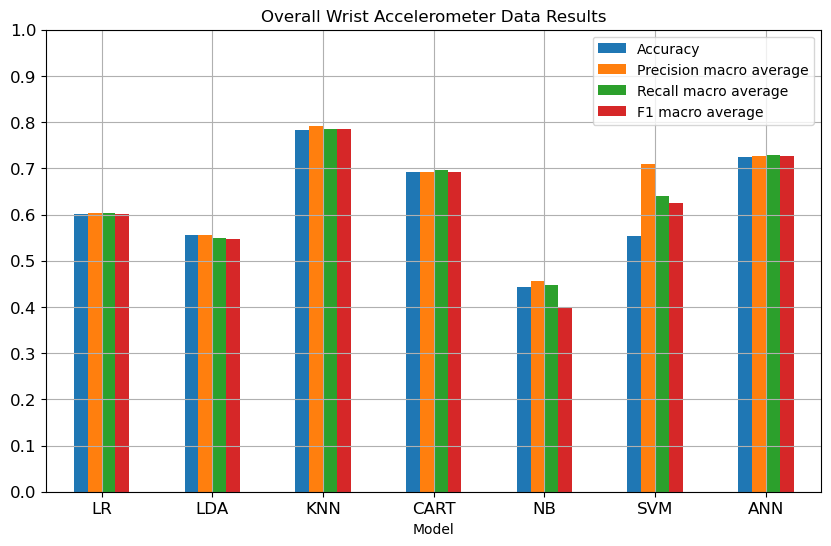

LR


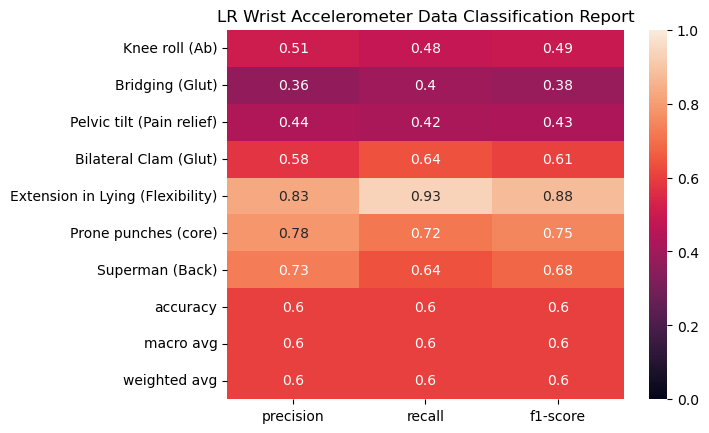

LDA


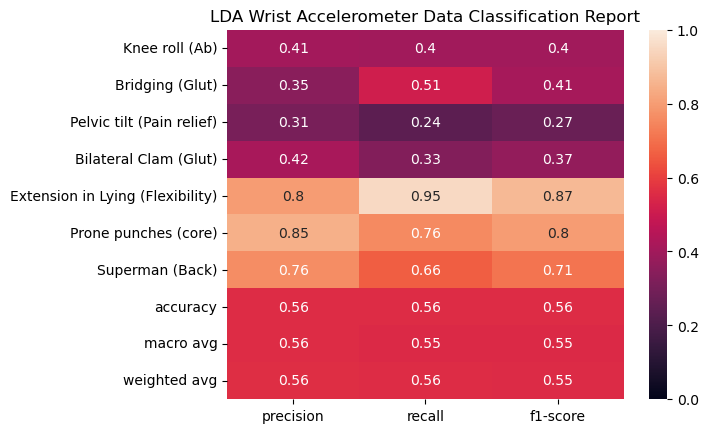

KNN


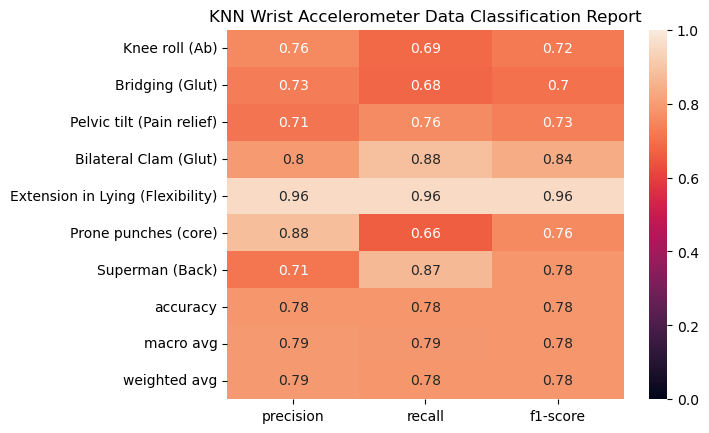

CART


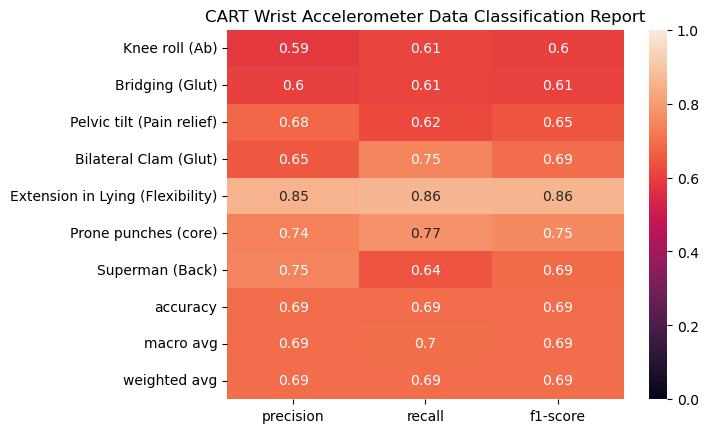

NB


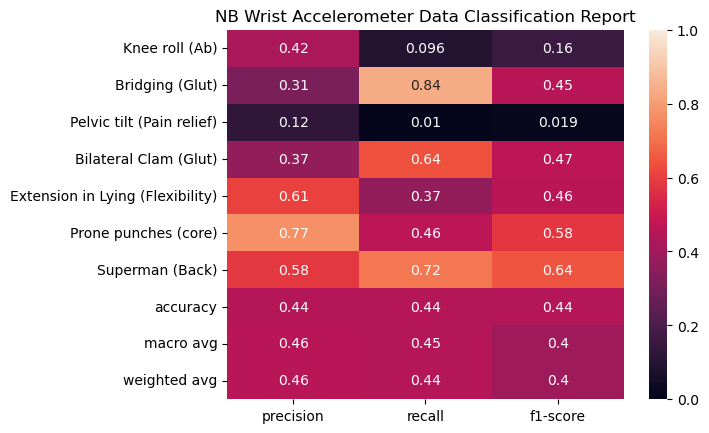

SVM


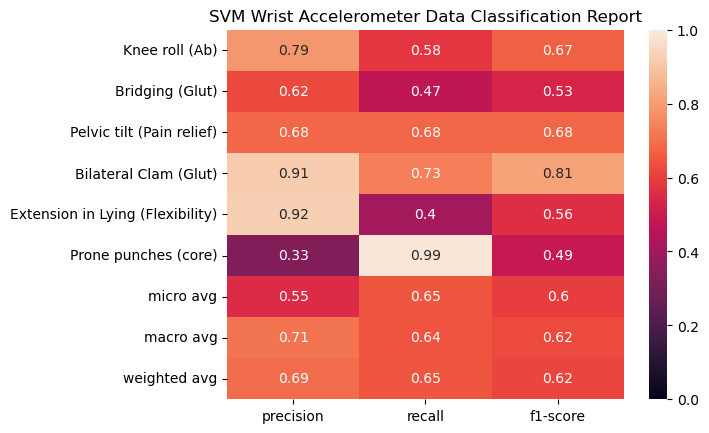

ANN


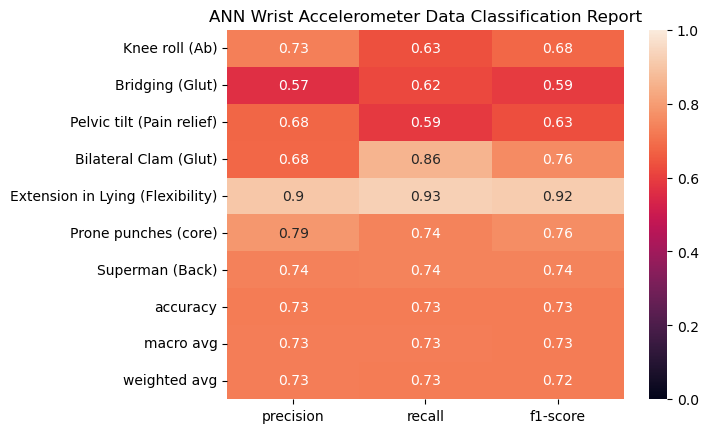

In [ ]:
plot_overall_results(results, 'Overall Wrist Accelerometer Data Results')
plot_classification_report_heatmap(clf_report, 'Wrist Accelerometer Data Classification Report')

### Thigh accelerometer evaluation

In [ ]:
print('Running algorithms for thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models(act_x_std, y, models)


Running algorithms for thigh accelerometer data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 4, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...
ANN  Successfully


In [ ]:
plot_overall_results(results, 'Overall thigh accelerometer data results')
plot_classification_report_heatmap(clf_report, 'Thigh accelerometer data classification report')

ValueError: 5 columns passed, passed data had 4 columns

### Pressure mat data evaluation

In [ ]:
print('Running algorithms for pressure mat data...')
# complete code here
results, clf_report = evaluate_models(pm_x_std, y, models)

In [ ]:
plot_overall_results(results, 'Overall pressure mat data results')
plot_classification_report_heatmap(clf_report, 'Pressure mat data classification report')

### Wrist and thigh accelerometer data evaluation

In [ ]:
print('Running algorithms for wrist and thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models(wt_x_std, y, models)

In [ ]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data classification report')

### Wrist and thigh accelerometer data and pressure mat data evaluation

In [ ]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')
# complete code here
results, clf_report = evaluate_models(wtp_x_std, y, models)

In [ ]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data and pressure mat data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data and pressure mat data classification report')

# 2.2 Evaluate the role of persons data on classification

In [ ]:
#print all unique person Ids
data[0].unique()

## Helper methods

In [ ]:
#helper function to split data by Leave-One-Person-Out
def lopo_split(df, indices=[], test_person=None):
    if test_person == None:
        print("Need test person id")
        return
    if len(indices) == 0 | len(indices)>2 | indices[0]<1 | indices[1]>872 | indices[0]>indices[1]:
        print("Need valid indices")
        return

    train_df = df[df[0]!=test_person]
    test_df = df[df[0]==test_person]
    X_train = train_df.iloc[:, indices[0]:indices[1]].to_numpy()
    X_test = test_df.iloc[:, indices[0]:indices[1]].to_numpy()
    y_train = train_df.iloc[:, 873].to_numpy()
    y_test = test_df.iloc[:, 873].to_numpy()

    return X_train, X_test, y_train, y_test


In [ ]:
#testing helper method
#indicies indicate the sensor or sensors needed
X_train, X_test, y_train, y_test = lopo_split(data, indices=[1, 181], test_person=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
print('Running algorithms for wrist accelerometer data...')
# complete code here


In [ ]:
print('Running algorithms for thigh accelerometer data...')

# complete code here

In [ ]:
print('Running algorithms for pressure mat data...')

# complete code here

In [ ]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')

# complete code here